In [140]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


# **Data Loading**

Loading the datasets (train.csv and test.csv) 

In [141]:
house_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
house_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [142]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [143]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [144]:
print('Shape of the taining set') 
print(house_train.shape)
print('\nShape of the testing set') 
print(house_test.shape)

Shape of the taining set
(1460, 81)

Shape of the testing set
(1459, 80)


In [145]:
print('Information about the taining set\n') 
house_train.info()
print('\nInformation about the testing set\n') 
house_test.info()

Information about the taining set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    14

# **Data Cleaning**

Data cleaning has to be done by identifying number of missing values within the datasets.
The training set has 1460 values and the testing set has 1459 values.
We need to find the precentage of missing values present.

In [146]:
data = [house_train, house_test]

for dataset in data:
    percentage = round(((dataset.isnull().sum()*100)/(dataset.shape[0])),4).sort_values(ascending=False)
    print(percentage.head(20),'\n')

PoolQC          99.5205
MiscFeature     96.3014
Alley           93.7671
Fence           80.7534
FireplaceQu     47.2603
LotFrontage     17.7397
GarageCond       5.5479
GarageType       5.5479
GarageYrBlt      5.5479
GarageFinish     5.5479
GarageQual       5.5479
BsmtExposure     2.6027
BsmtFinType2     2.6027
BsmtFinType1     2.5342
BsmtCond         2.5342
BsmtQual         2.5342
MasVnrArea       0.5479
MasVnrType       0.5479
Electrical       0.0685
Utilities        0.0000
dtype: float64 

PoolQC          99.7944
MiscFeature     96.5045
Alley           92.6662
Fence           80.1234
FireplaceQu     50.0343
LotFrontage     15.5586
GarageCond       5.3461
GarageQual       5.3461
GarageYrBlt      5.3461
GarageFinish     5.3461
GarageType       5.2090
BsmtCond         3.0843
BsmtQual         3.0158
BsmtExposure     3.0158
BsmtFinType1     2.8787
BsmtFinType2     2.8787
MasVnrType       1.0966
MasVnrArea       1.0281
MSZoning         0.2742
BsmtHalfBath     0.1371
dtype: float64 



From the above we realise that there are 6 features that have most missing values, thus we drop these features.  

In [147]:
for dataset in data:
    dataset.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis=1,inplace=True)

In [148]:
for dataset in data:
    percentage = round(((dataset.isnull().sum()*100)/(dataset.shape[0])),4).sort_values(ascending=False)
    print(percentage.head(30),'\n')

GarageType      5.5479
GarageYrBlt     5.5479
GarageFinish    5.5479
GarageCond      5.5479
GarageQual      5.5479
BsmtExposure    2.6027
BsmtFinType2    2.6027
BsmtFinType1    2.5342
BsmtCond        2.5342
BsmtQual        2.5342
MasVnrType      0.5479
MasVnrArea      0.5479
Electrical      0.0685
RoofMatl        0.0000
RoofStyle       0.0000
SalePrice       0.0000
Exterior1st     0.0000
Exterior2nd     0.0000
YearBuilt       0.0000
ExterQual       0.0000
ExterCond       0.0000
Foundation      0.0000
YearRemodAdd    0.0000
HouseStyle      0.0000
OverallCond     0.0000
OverallQual     0.0000
BldgType        0.0000
Condition2      0.0000
Condition1      0.0000
Neighborhood    0.0000
dtype: float64 

GarageYrBlt     5.3461
GarageFinish    5.3461
GarageCond      5.3461
GarageQual      5.3461
GarageType      5.2090
BsmtCond        3.0843
BsmtQual        3.0158
BsmtExposure    3.0158
BsmtFinType1    2.8787
BsmtFinType2    2.8787
MasVnrType      1.0966
MasVnrArea      1.0281
MSZoning        0

There are 28 features that have minimum missing values we can use the frequently occurring values to substitue these missing values. For this we use the mode function that helps us find the frequently occurring categorical and numerical values. 

In [149]:
values = ['GarageYrBlt','GarageFinish','GarageCond','GarageQual','GarageType','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2',
          'MasVnrType','BsmtHalfBath','MSZoning','Functional','Utilities','BsmtFullBath','Exterior2nd','Exterior1st','KitchenQual','TotalBsmtSF',
          'GarageCars','SaleType','GarageArea','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','MasVnrArea','Electrical']

for dataset in data:
    for feature in values:
        mode_in = dataset[feature].mode()[0]
        #print(mode_in)
        dataset[feature] =  dataset[feature].fillna(mode_in) 

In [150]:
for dataset in data:
    percentage = round(((dataset.isnull().sum()*100)/(dataset.shape[0])),4).sort_values(ascending=False)
    print(percentage.head(30),'\n')

SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
RoofStyle       0.0
YearBuilt       0.0
TotalBsmtSF     0.0
OverallCond     0.0
MSSubClass      0.0
MSZoning        0.0
LotArea         0.0
Street          0.0
LotShape        0.0
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
dtype: float64 

SaleCondition    0.0
YearRemodAdd     0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
RoofStyle        0.0
YearB

In [151]:
print("Columns in the training set: ",house_train.shape[1])
print("\nColumns in the testing set: ",house_test.shape[1])

Columns in the training set:  75

Columns in the testing set:  74


All the missing values within the datasets have been dealt with and the datasets are clean. Thus we now perform Exploratory Data Analysis (EDA).

# **Exploratory Data Analysis (Data Visualization)**

We find the correlation of each feature to the Sale Price and perform visual analysis on them.

In [152]:
correlation = house_train.corr()
correlation['SalePrice'].sort_values(ascending=False)[:11]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

We have selected the top 10 positively correlated features to perform our analysis.

In [153]:
max_corr = correlation['SalePrice'].sort_values(ascending=False)[:11].index
house_train[max_corr].head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000


OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64


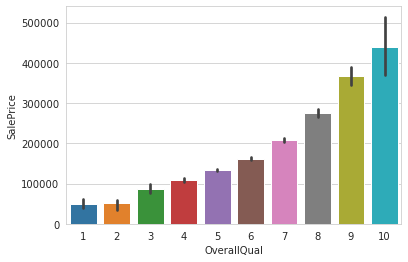

In [154]:
print(house_train.groupby('OverallQual').mean()['SalePrice'])
sns.barplot(x='OverallQual',y='SalePrice',data=house_train)

We observe that with an increase in the quality of the house the average cost of the house increases.

OverallQual
1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: Id, dtype: int64


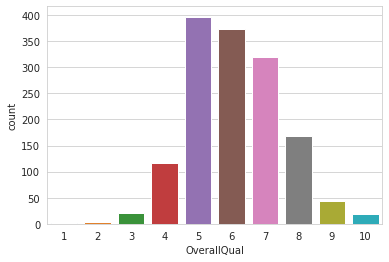

In [155]:
print(house_train.groupby('OverallQual').count()['Id'])
sns.countplot('OverallQual',data=house_train)

The maximum number of houses that are on sale belong to the house having a quality rating of 5. 

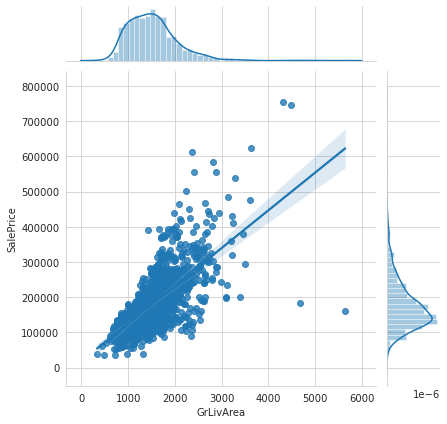

In [156]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=house_train,kind='reg')

The feature Ground Living Area has a positive correlation with the Sale Price of the house. This means that with every increase in the size of the area the cost of the house increases accordingly. If we look carfully we observe that there exists certain outliers. These need to be handled.

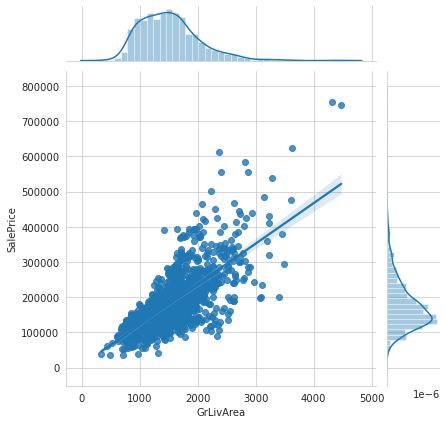

In [157]:
house_train = house_train[house_train['GrLivArea']<4500]
sns.jointplot(x='GrLivArea',y='SalePrice',data=house_train,kind='reg')

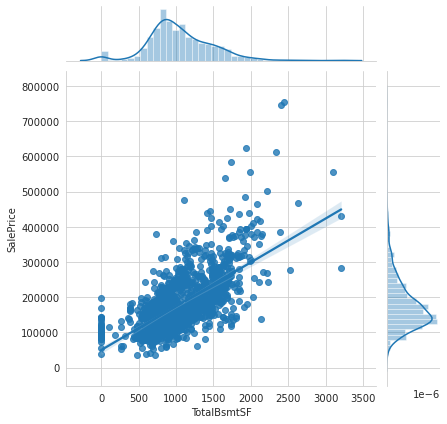

In [158]:
sns.jointplot(x='TotalBsmtSF',y='SalePrice',data=house_train,kind='reg')

The feature Total Basement Square Foot has a positive correlation with the Sale Price of the house. An increase in the Square Foot of the Basement causses an equivalent increase in the Sale Price. The Basement Square Foot mainly lies between 500-2000 Square Foot, along with the Sale Price being between 5000-400000

FullBath
0      9
1    650
2    767
3     32
Name: Id, dtype: int64


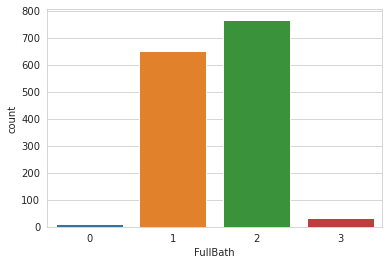

In [159]:
print(house_train.groupby('FullBath').count()['Id'])
sns.countplot('FullBath',data=house_train)

There are a maximum of 1 and 2 Full Bathroom available for sale.

TotRmsAbvGrd
2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     17
12     10
14      1
Name: Id, dtype: int64


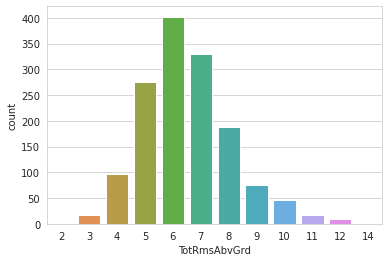

In [160]:
print(house_train.groupby('TotRmsAbvGrd').count()['Id'])
sns.countplot('TotRmsAbvGrd',data=house_train)

There are many house available that have 6 Rooms Above Ground.

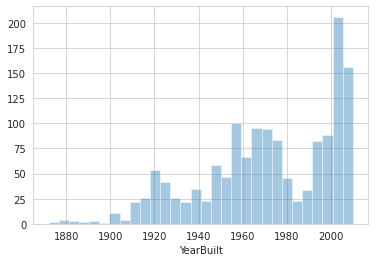

In [161]:
sns.distplot(house_train['YearBuilt'],bins=30,kde=False)

The maximum number of houses were built in the 2010.

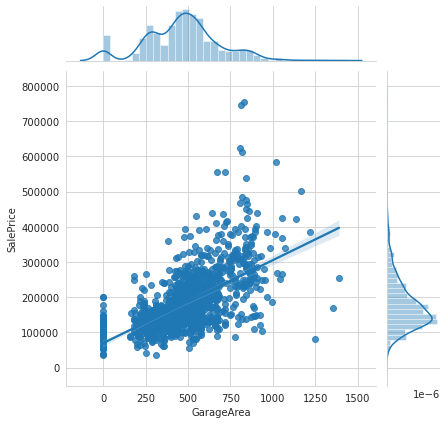

In [162]:
sns.jointplot(x='GarageArea',y='SalePrice',data=house_train,kind='reg')

The feature Garage Area has a positive correlation with the Sale Price of the house. An increase in the Area of the Garage causses an equivalent increase in the Sale Price. The Garage Area mainly lies between 250-750 Square Foot, along with the Sale Price being between 100000-200000. There exists certain outliers. These need to be handled.

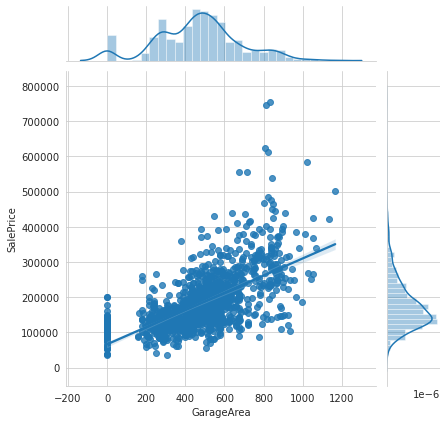

In [163]:
house_train = house_train[house_train['GarageArea'] < 1200]
sns.jointplot(x='GarageArea',y='SalePrice',data=house_train,kind='reg')


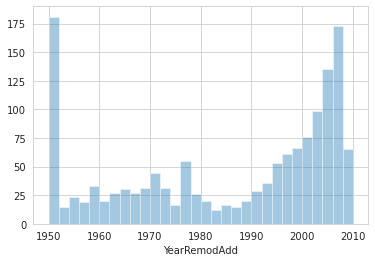

In [164]:
sns.distplot(house_train['YearRemodAdd'],bins=30,kde=False)

Houses were remodeled in the year 1950 and 2009.

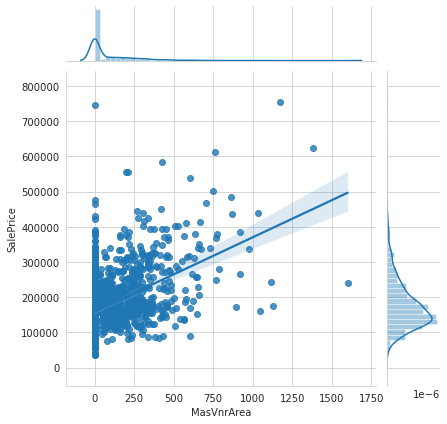

In [165]:
sns.jointplot(x='MasVnrArea',y='SalePrice',data=house_train,kind='reg')

There is a positive correlation between the following 2 features of the house. On closer observations we notice there exists certain outliers. These need to be handled.

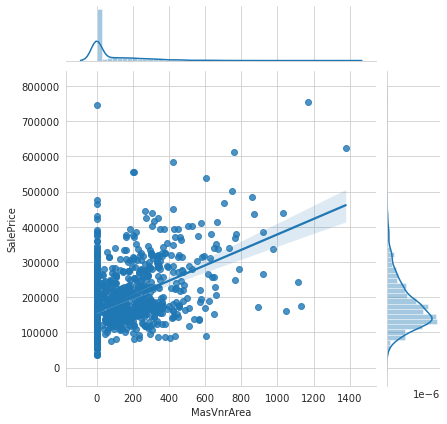

In [166]:
house_train = house_train[house_train['MasVnrArea']<1500]
sns.jointplot(x='MasVnrArea',y='SalePrice',data=house_train,kind='reg')

Text(0.5, 1.0, 'Subplot 2: Cost Of Garage')

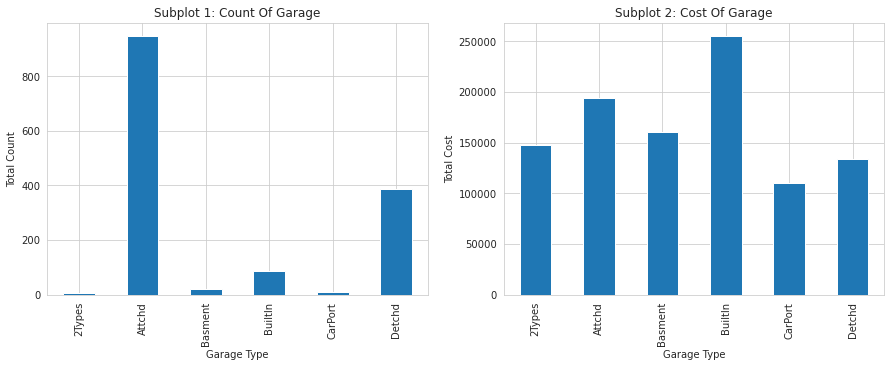

In [167]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
gar = house_train.groupby('GarageType').count()['Id']
gar.plot.bar()
plt.xlabel('Garage Type')
plt.ylabel('Total Count')
plt.title('Subplot 1: Count Of Garage')

plt.subplot(1,2,2)
gar = house_train.groupby('GarageType').mean()['SalePrice']
gar.plot.bar()
plt.xlabel('Garage Type')
plt.ylabel('Total Cost')
plt.title('Subplot 2: Cost Of Garage')

There are many Attached Garage available for sale which is quite economically feasible for the potential buyers. Whereas the most expensive type of garage is the Built in garage. We also notice that the most cost affective Garage is the Car Port, the only drawback to this that is not readily available.

In [168]:
table1 = pd.pivot_table(house_train, values=['SalePrice'], index=['Street'],columns=['LotShape'],aggfunc=np.mean)
table1

SalePrice                                        
LotShape            IR1       IR2            IR3            Reg
Street                                                         
Grvl      228950.000000  110000.0            NaN  120397.666667
Pave      206030.158004  243079.2  222262.777778  164651.112200

Text(0, 0.5, 'Sale Price')

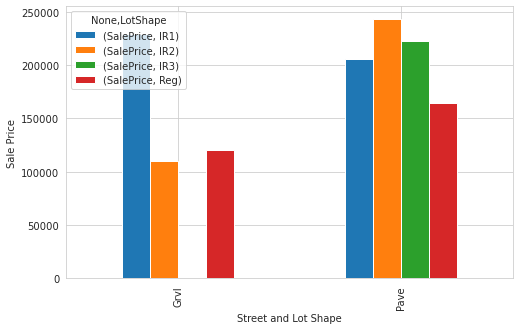

In [169]:
ax = table1.plot.bar(figsize=(8,5))
ax.set_xlabel("Street and Lot Shape")
ax.set_ylabel("Sale Price")

There are many house present at the pave which have higher sale price as compared to the house at grvl. Among the many house at the pave the houses that are of shape IR2 are much more expensive than the rest of the available house.

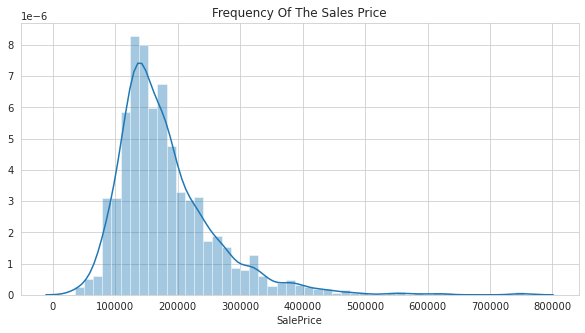

In [170]:
plt.figure(figsize=(10,5))
plt.title('Frequency Of The Sales Price')
plt.xlabel('Sales Price')
sns.distplot(house_train['SalePrice'])

We observe that the maximum number of houses cost between 100000 - 300000.

Y    1358
N      95
Name: CentralAir, dtype: int64


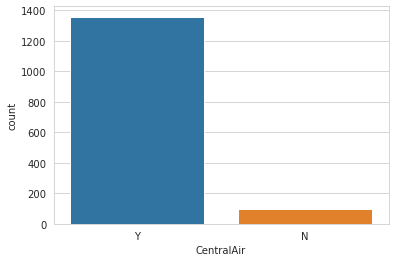

In [171]:
print(house_train['CentralAir'].value_counts())
sns.countplot('CentralAir',data = house_train)

About 1360 houses have and centralized air conditioning facility.

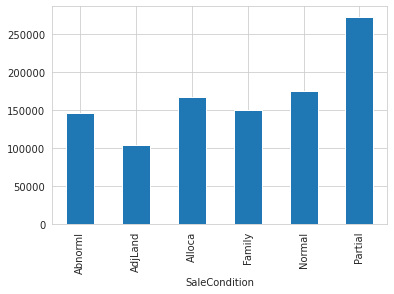

In [172]:
sale = house_train.groupby('SaleCondition').mean()['SalePrice']
sale.plot.bar()

The cost of the Partial conditioned houses are more than the rest of the houses.

# **Summary Of Observations**

* The most expensive house costs 800K $
* Many houses that were initially built were later remodeled, thus the cost of such houses have increased over time.
* There is a range of houses that are affordable, and these can be filtered as per the requirement of the buyers.
* A positive relation is noticed between ground living area, basement square foot, garage area and the sales price. These features can be very useful to estimate the cost of a house.
* Apart from the above mentioned features, there also exists many positive correlation of other features with sales price.



# **Data Modeling**

For the purpose of Data Modeling we need to split our data into training and test set.
Once the split is done we can put our data into various models and check each the precision of each model.
We select the model with the highest precision score.

In [173]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

We select the numeric values from the training and the testing set.

In [229]:
numeric_train = pd.DataFrame(house_train.select_dtypes(include=[np.number]))
numeric_test =  pd.DataFrame(house_test.select_dtypes(include=[np.number]))

In [230]:
new_data = [numeric_train, numeric_test]

In both the dataset there is an ID for the houses. ID is used to individually identify a sale, therefore it may not be very useful for us during our analysis. We need to drop each of the ID from the 2 sets.  

In [232]:
for dataset in new_data:
    dataset.drop(['Id'],axis=1,inplace=True)

In [233]:
for dataset in new_data:
    for i in dataset.columns:
            dataset[i] = dataset[i].astype(int)

We will modify yearbuilt and yearremodadd as the age of sale.

In [234]:
for dataset in new_data:
    dataset['YearBltAge'] = dataset['YrSold'] - dataset['YearBuilt']
    dataset['RemodAge'] = dataset['YrSold'] - dataset['YearRemodAdd']

In [235]:
for dataset in new_data:
    dataset.drop(['YrSold','YearBuilt'],axis=1,inplace=True)

In [246]:
numeric_train['SalePrice'] = numeric_train['SalePrice'].fillna(0)
numeric_train['SalePrice'] = numeric_train['SalePrice'].astype(int)

In [247]:
print("Shape of the training set")
print(numeric_train.shape)
print("\nShape of the testing set")
print(numeric_test.shape)

Shape of the training set
(1453, 36)

Shape of the testing set
(1459, 35)


In [248]:
X = numeric_train.drop('SalePrice',axis=1)
y = np.log(numeric_train['SalePrice'])

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# **1. Linear Regression**

In [250]:
#Import Packages 
from sklearn.linear_model import LinearRegression

In [251]:
#Object creation and fitting of training set
lrm = LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
#Creation of a prediction variable
predictionslrm = lrm.predict(X_test)

In [253]:
#Create a prediction score
scorelrm = round((lrm.score(X_test, y_test)*100),2)
print ("Model Score:",scorelrm,"%")

Model Score: 90.94 %


# **2. Ridge Regression**

In [254]:
#Import Packages 
from sklearn.linear_model import Ridge

In [255]:
#Object creation and fitting of training set
rrm = Ridge(alpha=100)
rrm.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [256]:
#Creation of a prediction variable
predictionrrm = rrm.predict(X_test)

In [257]:
#Create a prediction score
scorerrm = round((rrm.score(X_test, y_test)*100),2)
print ("Model Score:",scorerrm,"%")

Model Score: 91.01 %


# **Conclusion**

In [199]:
data = [['Linear Regression',scorelrm],['Ridge Regression',scorerrm]]
final = pd.DataFrame(data,columns=['Algorithm','Precision'],index=[1,2])
final

,Algorithm,Precision
1,Linear Regression,90.94
2,Ridge Regression,91.01
